In [56]:
#base de dados extraída do Kaggle
#Aluno:Felipe L. M Alves

# Importação dos pacotes
import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go



In [57]:
#leitura da base Walmart
df = pd.read_csv('Walmart.csv')
df.head()



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [58]:
# Ajuste de colunas e inclusão weekday,month e year.

df['Date']=pd.to_datetime(df['Date'])

df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df.drop(['Date'], axis=1, inplace=True)#,'month'



df.head()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [59]:
# converting days and months from numerics to categories
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['weekday'] = df['weekday'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['month']= df['month'].map(months)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010


In [60]:
#filtro 2010
df10 = df.loc[(df['year'] == 2010)]
df10.head()
#filtro 2011
df11 = df.loc[(df['year'] == 2011)]
df11.head()
#filtro 2012
df12 = df.loc[(df['year'] == 2012)]
df12.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
100,1,1550369.92,0,49.01,3.157,219.714258,7.348,Thursday,June,2012
101,1,1459601.17,0,48.53,3.261,219.892526,7.348,Thursday,January,2012
102,1,1394393.84,0,54.11,3.268,219.985689,7.348,Thursday,January,2012
103,1,1319325.59,0,54.26,3.290,220.078852,7.348,Thursday,January,2012
104,1,1636339.65,0,56.55,3.360,220.172015,7.348,Thursday,March,2012


In [61]:
  # Vendas por ano total de 2010,2011,2012.Tendo como destaque as vendas de 2011 em relaçao aos demais anos.


df2 = df.groupby('year').agg({"Weekly_Sales" : "sum"}).reset_index()
fig = px.bar(df2, x="year", y="Weekly_Sales",title='Vendas por Ano',text_auto=True)

fig.show()



In [62]:
  # Vendas por ano total de 2010. As vendas tiveram destaque nos meses de maio,outubro e dezembro.
df2010 = df10.groupby('month').agg({"Weekly_Sales" : "sum"}).reset_index()
fig = px.bar(df2010, x="month", y="Weekly_Sales",title='Vendas por mês - 2010',text_auto=True)

fig.show()

  # Vendas por ano total de 2011. Destaque para as vendas nos meses de abril e dezembro.
df2011 = df11.groupby('month').agg({"Weekly_Sales" : "sum"}).reset_index()
fig = px.bar(df2011, x="month", y="Weekly_Sales",title='Vendas por mês - 2011',text_auto=True)

fig.show()

  # Vendas por ano total de 2012.Destaque positivo de vendas em junho e queda  em novembro e dezembro. Meses criticos em relaçao a crise internacional que afetou os e
  #Estados Unidos.
df2012 = df12.groupby('month').agg({"Weekly_Sales" : "sum"}).reset_index()
fig = px.bar(df2012, x="month", y="Weekly_Sales",title='Vendas por mês - 2012',text_auto=True)

fig.show()

In [63]:
#TOP 10 maiores vendas no período de 2010 até 2012. Destaque para as lojas 10,13 e 20 que aparecem nos anos de 2010 e 2011 com vendas altas.

df[['Store', 'month','year', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price']].nlargest(10,'Weekly_Sales')

,Store,month,year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price
1905,14,December,2010,3818686.45,0,30.59,3.141
2763,20,December,2010,3766687.43,0,25.17,3.141
1333,10,December,2010,3749057.69,0,57.06,3.236
527,4,December,2011,3676388.98,0,35.92,3.103
1762,13,December,2010,3595903.20,0,34.90,2.846
1814,13,December,2011,3556766.03,0,24.76,3.186
2815,20,December,2011,3555371.03,0,40.19,3.389
475,4,December,2010,3526713.39,0,43.21,2.887
1385,10,December,2011,3487986.89,0,48.36,3.541
189,2,December,2010,3436007.68,0,49.97,2.886


In [64]:
df2 = df.groupby('weekday')['Weekly_Sales'].sum().reset_index()
df2.head(10)

,weekday,Weekly_Sales
0,Friday,2.824947e+08
1,Monday,4.335075e+08
2,Saturday,4.266091e+08
3,Sunday,5.390133e+08
4,Thursday,4.486257e+09
5,Tuesday,9.271282e+07
6,Wednesday,4.766244e+08


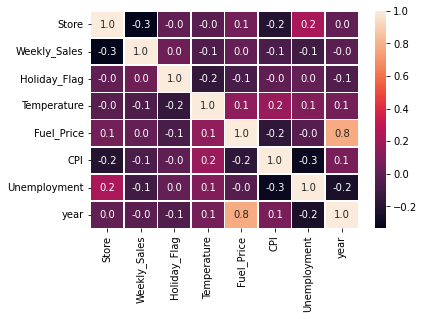

In [65]:
#Pontos de correlação em relação as vendas:
#Aumento do desemprego, CPI(aumento do indice de preços) e temperatura impactam negativamente as vendas com a 
#correlação ainda que baixa de -0.1. 

correlation = df.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [66]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000
